In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf



In [38]:
#import data
country_scores = pd.read_csv("./data/country_scores.csv")
country_incomes = pd.read_csv("./data/WDI_data.csv")
country_incomes

,Country Name,Country Code,Series Name,Series Code,2015 [YR2015]
0,Afghanistan,AFG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1809.01648820483
1,Afghanistan,AFG,"School enrollment, primary (% net)",SE.PRM.NENR,..
2,Afghanistan,AFG,"School enrollment, primary (% gross)",SE.PRM.ENRR,107.225357055664
3,Albania,ALB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10971.2925173789
4,Albania,ALB,"School enrollment, primary (% net)",SE.PRM.NENR,95.1996002197266
...,...,...,...,...,...
792,NaN,NaN,NaN,NaN,NaN
793,NaN,NaN,NaN,NaN,NaN
794,NaN,NaN,NaN,NaN,NaN
795,Data from database: World Development Indicators,NaN,NaN,NaN,NaN


In [39]:
#Cleaning dataset country_income with some filters
country_incomes = country_incomes.dropna()
country_incomes = country_incomes[country_incomes["2015 [YR2015]"] != '..']
country_incomes = country_incomes[country_incomes["Series Name"] == country_incomes["Series Name"].iloc[0]]
                     
                                  
                                  

In [40]:
country_incomes 

,Country Name,Country Code,Series Name,Series Code,2015 [YR2015]
0,Afghanistan,AFG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1809.01648820483
3,Albania,ALB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10971.2925173789
6,Algeria,DZA,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,13724.723852895
15,Angola,AGO,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,6231.06799206401
18,Antigua and Barbuda,ATG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,20154.9474879241
...,...,...,...,...,...
777,West Bank and Gaza,PSE,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,4339.10369305975
780,World,WLD,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,14766.537605517
783,"Yemen, Rep.",YEM,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,2641.04582911357
786,Zambia,ZMB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,3627.20204093772


In [41]:
country_scores

,Country,Country Code,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),"Median Math Score (TIMSS Scale, 4th Grade)","Median Reading Score (PIRLS Scale, 4th Grade)"
0,U.A.E.,ARE,64.0,64.0,437.0,440.0
1,Argentina,ARG,51.0,66.0,407.0,431.0
2,Armenia,ARM,72.0,NaN,454.0,NaN
3,Australia,AUS,90.0,93.0,520.0,534.0
4,Austria,AUT,95.0,97.0,511.0,533.0
...,...,...,...,...,...,...
73,Turkey,TUR,77.0,NaN,477.0,NaN
74,Uruguay,URY,57.0,70.0,425.0,450.0
75,United States,USA,96.0,98.0,544.0,560.0
76,Yemen,YEM,9.0,NaN,243.0,NaN


In [42]:
#Merge the two dataset and drop the columns that are useless for the analysis
data = country_scores.merge(country_incomes[["Country Code","2015 [YR2015]"]],how="inner",on="Country Code")
data = data.drop(columns=["Percent Above Math Benchmark (400 on TIMSS Scale)","Percent Above Reading Benchmark (400 on PIRLS Scale)"])

In [43]:
data = data.dropna() #drop the NaN values 
data.dtypes # check the types of the data

Country                                           object
Country Code                                      object
Median Math Score (TIMSS Scale, 4th Grade)       float64
Median Reading Score (PIRLS Scale, 4th Grade)    float64
2015 [YR2015]                                     object
dtype: object

In [44]:
data["2015 [YR2015]"] = data["2015 [YR2015]"].astype(float,
                                                     errors="raise") # convert column:'2015 [YR2015]' object -> float
data.dtypes

Country                                           object
Country Code                                      object
Median Math Score (TIMSS Scale, 4th Grade)       float64
Median Reading Score (PIRLS Scale, 4th Grade)    float64
2015 [YR2015]                                    float64
dtype: object

Text(0, 0.5, 'PIRLS')

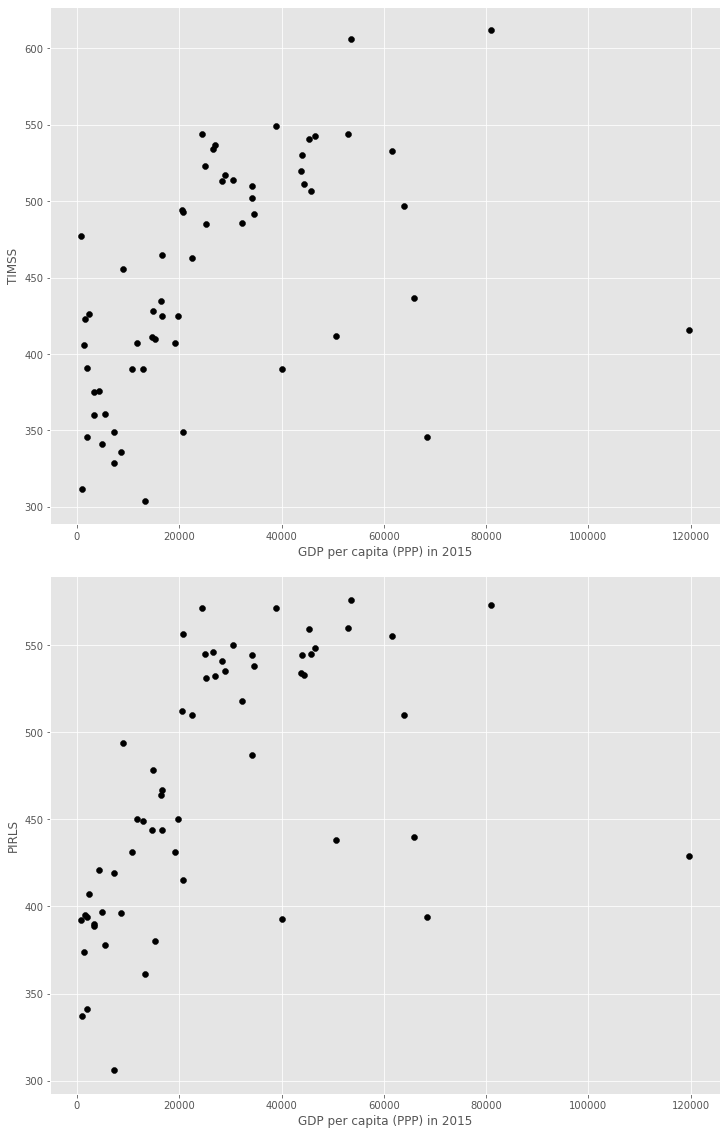

In [45]:
#Plot the data to visualize and explore if there are correlations
plt.figure(figsize=(12,20))
plt.style.use("ggplot")
plt.subplots_adjust(hspace=.1)
plt.subplot(2,1,1)
plt.scatter(data["2015 [YR2015]"],data["Median Math Score (TIMSS Scale, 4th Grade)"],c="k")
plt.xlabel("GDP per capita (PPP) in 2015")
plt.ylabel("TIMSS")
plt.subplot(2,1,2)
plt.scatter(data["2015 [YR2015]"],data["Median Reading Score (PIRLS Scale, 4th Grade)"],c="k")
plt.xlabel("GDP per capita (PPP) in 2015")
plt.ylabel("PIRLS")

#### Οπως βλέπουμε στα δυο διαγραμματα φενεται πως η συναρτηση που μοντελοποιεί τα δεδομενα ειναι λογαριθμική του τύπου  y = a*logx + b. Για αυτο τον λόγο θα λογαριθμισουμέ το x και αν τα δεδομενα γινουν γραμμικα τοτέ επιβεβαιώνεται η υπόθεση

Text(0, 0.5, 'PIRLS')

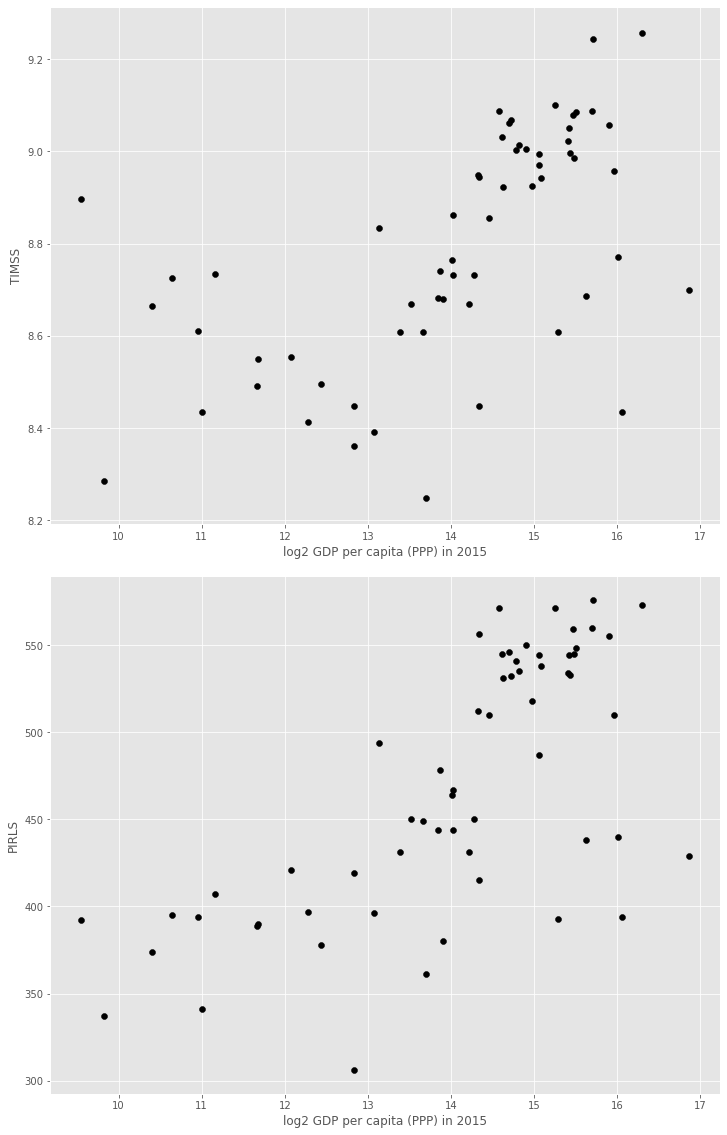

In [46]:
#Plot with log2 x to see if there wiil be linear
plt.figure(figsize=(12,20))
plt.style.use("ggplot")
plt.subplots_adjust(hspace=.1)
plt.subplot(2,1,1)
plt.scatter(np.log2(data["2015 [YR2015]"]),np.log2(data["Median Math Score (TIMSS Scale, 4th Grade)"]),c="k")
plt.xlabel("log2 GDP per capita (PPP) in 2015")
plt.ylabel("TIMSS")
plt.subplot(2,1,2)
plt.scatter(np.log2(data["2015 [YR2015]"]),data["Median Reading Score (PIRLS Scale, 4th Grade)"],c="k")
plt.xlabel("log2 GDP per capita (PPP) in 2015")
plt.ylabel("PIRLS")

#### Πράγματι η υπόθεση επιβεβαιώνεται και το μοντελο να έχει μια γραμμική τάση

In [48]:
#Rename the columns for simplicity
data.rename(columns={"Median Math Score (TIMSS Scale, 4th Grade)":"TIMSS",
                     "Median Reading Score (PIRLS Scale, 4th Grade)":"PIRLS",
                     "2015 [YR2015]":"GDP"},inplace=True)
data

,Country,Country Code,TIMSS,PIRLS,GDP
0,U.A.E.,ARE,437.0,440.0,65975.375547
1,Argentina,ARG,407.0,431.0,19101.297392
3,Australia,AUS,520.0,534.0,43719.502165
4,Austria,AUT,511.0,533.0,44353.875214
5,Azerbaijan,AZE,465.0,467.0,16698.863653
...,...,...,...,...,...
67,Sweden,SWE,507.0,545.0,45679.277997
68,Chad,TCD,346.0,341.0,2047.637179
69,Togo,TGO,406.0,374.0,1349.371568
74,Uruguay,URY,425.0,450.0,19831.445894


In [49]:
#Check for linear correlation on log GDP and TIMSS
linear_mod_TIMSS = smf.ols("TIMSS ~ np.log2(GDP)",data=data)
linear_res_TIMSS = linear_mod_TIMSS.fit()
linear_res_TIMSS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  TIMSS   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     30.19
Date:                Thu, 21 Apr 2022   Prob (F-statistic):           8.77e-07
Time:                        11:46:00   Log-Likelihood:                -337.79
No. Observations:                  61   AIC:                             679.6
Df Residuals:                      59   BIC:                             683.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       86.5978     66.508      1.302      0.198     -46.485     219.680
np.log2(GDP)    25.8861      4.711      5.494      0.000      16.459      35.314
==============================================================================
Omnibus:                        1.183   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.554   Jarque-Bera (JB):                1.116
Skew:                          -0.316   Prob(JB):                        0.572
Kurtosis:                       2.802   Cond. No.                         118.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Παρατηρούμε ενα R= 0.338 το οποίο σημαίνει πως το 34% των δεδομένων εξηγείται απο την γραμμική συσχέτιση

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0, 0.5, 'TIMSS')

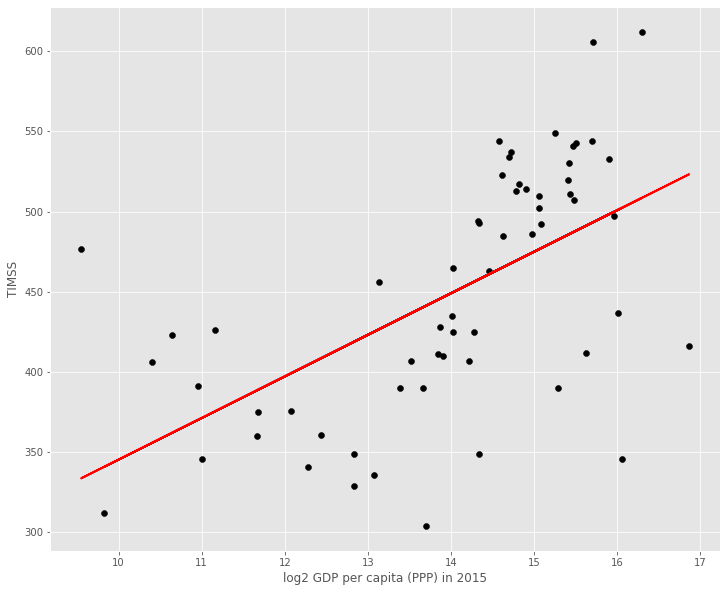

In [50]:
#Plot with the line that fit in model
x = np.log2(data["GDP"])
y = linear_res_TIMSS.params["Intercept"] + linear_res_TIMSS.params["np.log2(GDP)"]*x
plt.figure(figsize=(12,10))
plt.style.use("ggplot")
plt.scatter(np.log2(data["GDP"]),(data["TIMSS"]),c="k")
plt.plot(x,y,c="r",linewidth=2)
plt.xlabel("log2 GDP per capita (PPP) in 2015")
plt.ylabel("TIMSS")

In [51]:
#check for linear correlation on log GDP and PIRLS
linear_mod_PIRLS = smf.ols("PIRLS ~ np.log2(GDP)",data=data)
linear_res_PIRLS = linear_mod_PIRLS.fit()
linear_res_PIRLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PIRLS   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     52.59
Date:                Thu, 21 Apr 2022   Prob (F-statistic):           1.01e-09
Time:                        11:46:07   Log-Likelihood:                -328.75
No. Observations:                  61   AIC:                             661.5
Df Residuals:                      59   BIC:                             665.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       56.2165     57.346      0.980      0.331     -58.532     170.965
np.log2(GDP)    29.4590      4.062      7.252      0.000      21.330      37.588
==============================================================================
Omnibus:                        8.028   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                7.993
Skew:                          -0.885   Prob(JB):                       0.0184
Kurtosis:                       3.107   Cond. No.                         118.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Παρατηρούμε ενα R= 0.471 το οποίο σημαίνει πως το 47% των δεδομένων εξηγείται απο την γραμμική συσχέτιση

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0, 0.5, 'PIRLS')

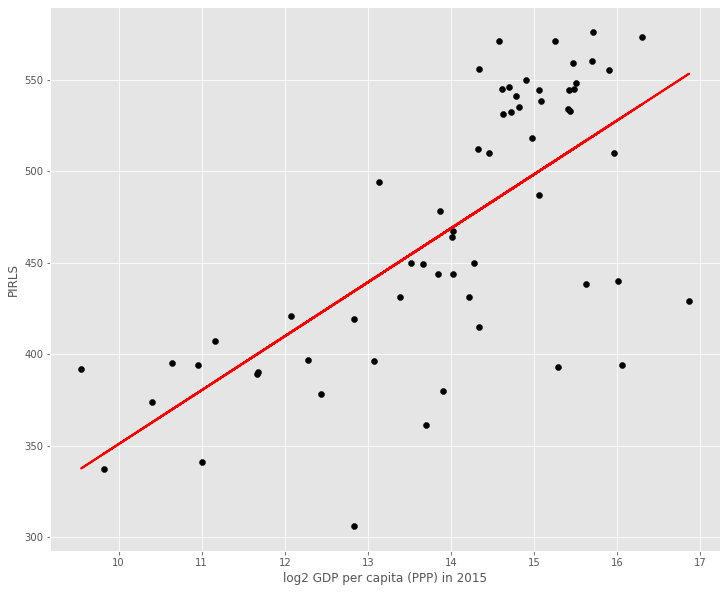

In [52]:
#Plot with the line that fit in model
x = np.log2(data["GDP"])
y = linear_res_PIRLS.params["Intercept"] + linear_res_PIRLS.params["np.log2(GDP)"]*x
plt.figure(figsize=(12,10))
plt.style.use("ggplot")
plt.scatter(np.log2(data["GDP"]),data["PIRLS"],c="k")
plt.plot(x,y,c="r",linewidth=2)
plt.xlabel("log2 GDP per capita (PPP) in 2015")
plt.ylabel("PIRLS")

,Country,Country Code,TIMSS,PIRLS,GDP
0,U.A.E.,ARE,437.0,440.0,65975.375547
1,Argentina,ARG,407.0,431.0,19101.297392
3,Australia,AUS,520.0,534.0,43719.502165
4,Austria,AUT,511.0,533.0,44353.875214
5,Azerbaijan,AZE,465.0,467.0,16698.863653
...,...,...,...,...,...
67,Sweden,SWE,507.0,545.0,45679.277997
68,Chad,TCD,346.0,341.0,2047.637179
69,Togo,TGO,406.0,374.0,1349.371568
74,Uruguay,URY,425.0,450.0,19831.445894


In [54]:
#import another dataset with years of schooling data
age_of_education = pd.read_stata("./data/BL2013_MF1599_v2.2.dta")
age_of_education_2010 = age_of_education[age_of_education.year == 2010.0]
age_of_education_2010 = age_of_education_2010.rename(columns={"country":"Country"})
age_of_education_2010

,BLcode,Country,year,sex,agefrom,ageto,lu,lp,lpc,ls,lsc,lh,lhc,yr_sch,yr_sch_pri,yr_sch_sec,yr_sch_ter,pop,WBcode,region_code
12,1.0,Algeria,2010.0,MF,15.0,999.0,21.124104,43.897926,25.876770,23.205688,17.081598,11.772276,6.663670,6.678049,4.191919,2.117411,0.368719,25853.0,DZA,Middle East and North Africa
25,3.0,Benin,2010.0,MF,15.0,999.0,53.908321,18.656332,12.183230,23.672802,17.771658,3.762543,2.008301,4.430164,2.571308,1.743440,0.115417,5579.0,BEN,Sub-Saharan Africa
38,4.0,Botswana,2010.0,MF,15.0,999.0,9.826900,6.240109,4.759118,80.042625,29.029333,3.890366,2.022110,9.554915,6.260282,3.176384,0.118250,1107.0,BWA,Sub-Saharan Africa
51,6.0,Burundi,2010.0,MF,15.0,999.0,50.430645,39.345234,25.978859,9.183236,4.968499,1.040882,0.544171,3.346481,2.781254,0.533526,0.031701,5068.0,BDI,Sub-Saharan Africa
64,7.0,Cameroon,2010.0,MF,15.0,999.0,20.732958,47.911888,31.252216,28.285789,15.275344,3.069362,1.635491,6.154877,4.256232,1.804547,0.094097,10766.0,CMR,Sub-Saharan Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1845,326.0,Republic of Moldova,2010.0,MF,15.0,999.0,0.976749,6.086153,3.653862,78.326561,54.266289,14.610540,8.756674,10.404020,3.912284,6.024392,0.467344,2982.0,ROM,Europe and Central Asia
1858,329.0,Serbia,2010.0,MF,15.0,999.0,2.960607,8.992959,7.690698,73.507530,48.711517,14.538917,8.968564,10.845333,6.029522,4.345661,0.470150,8667.0,SER,Europe and Central Asia
1871,331.0,Slovenia,2010.0,MF,15.0,999.0,0.657998,3.077496,2.661207,76.408531,56.119919,19.855972,13.252562,11.890487,6.387317,4.841000,0.662170,1700.0,SVN,Europe and Central Asia
1884,342.0,"China, Macao Special Administrative Region",2010.0,MF,15.0,999.0,3.457963,21.363201,16.163477,58.113544,32.111195,17.065292,10.434196,8.543072,4.873250,3.119832,0.549990,416.0,MAC,East Asia and the Pacific


In [55]:
data_with_sch = data.merge(age_of_education_2010[["Country","yr_sch"]],how="inner",on="Country")
print(data_with_sch[data_with_sch['yr_sch'].isna()])

Empty DataFrame
Columns: [Country, Country Code, TIMSS, PIRLS, GDP, yr_sch]
Index: []


Text(0, 0.5, 'Years Of Schooling')

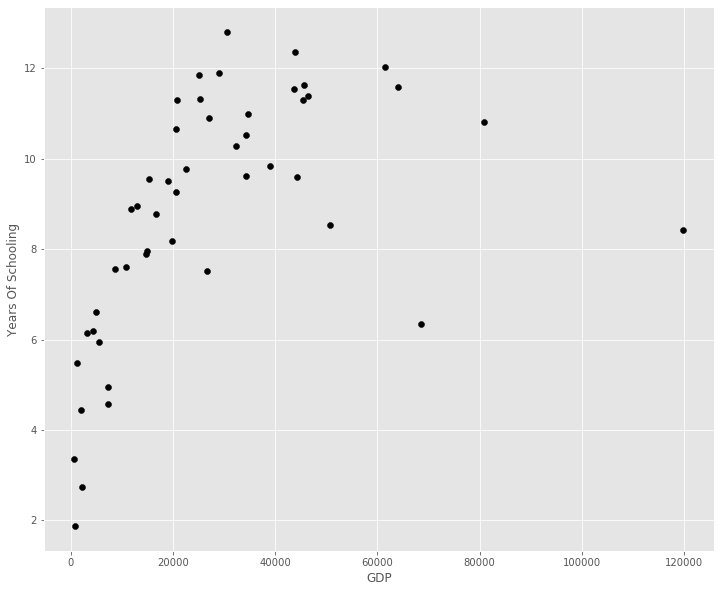

In [56]:
#plot GDP - education years
plt.figure(figsize=(12,10))
plt.scatter(data_with_sch["GDP"],data_with_sch["yr_sch"],c="k")
plt.xlabel("GDP")
plt.ylabel("Years Of Schooling")

#### Από το διάγραμμα φένεται η σχέση μεταξυ των δεδομένων πως είναι λογαριθμική και πως η συνάρτηση που τα μοντελοποιεί είναι του τύπου y = a*logx + b. Θα λογαριθμίσουμε τον x για να δούμε αν ισχύει η υπόθεση

Text(0, 0.5, 'Years Of Schooling')

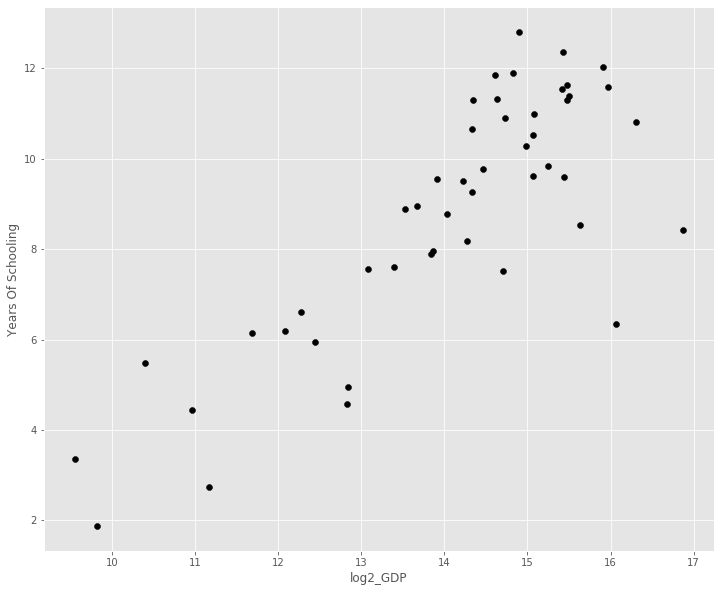

In [57]:
#plot log2(GDP) - education years
plt.figure(figsize=(12,10))
plt.scatter(np.log2(data_with_sch["GDP"]),data_with_sch["yr_sch"],c="k")
plt.xlabel("log2_GDP")
plt.ylabel("Years Of Schooling")

#### Πράγματι η υπόθεση επιβεβαιώνεται και το μοντελο φένεται να είναι αρκετά γραμμικό

In [58]:
#Check for linear correlation on log2_GDP and Years Of Schooling
linear_mod_ysc = smf.ols("yr_sch~np.log2(GDP)",data=data_with_sch)
linear_res_ysc = linear_mod_ysc.fit()
linear_res_ysc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 yr_sch   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     90.29
Date:                Thu, 21 Apr 2022   Prob (F-statistic):           2.01e-12
Time:                        11:46:39   Log-Likelihood:                -89.727
No. Observations:                  48   AIC:                             183.5
Df Residuals:                      46   BIC:                             187.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -9.5189      1.939     -4.909      0.000     -13.422      -5.615
np.log2(GDP)     1.3018      0.137      9.502      0.000       1.026       1.578
==============================================================================
Omnibus:                       10.871   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               10.728
Skew:                          -0.962   Prob(JB):                      0.00468
Kurtosis:                       4.290   Cond. No.                         119.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Παρατηρούμε ενα R= 0.662 το οποίο σημαίνει πως το 66% των δεδομένων εξηγείται απο την γραμμική συσχέτιση

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0, 0.5, 'Years Of Schooling')

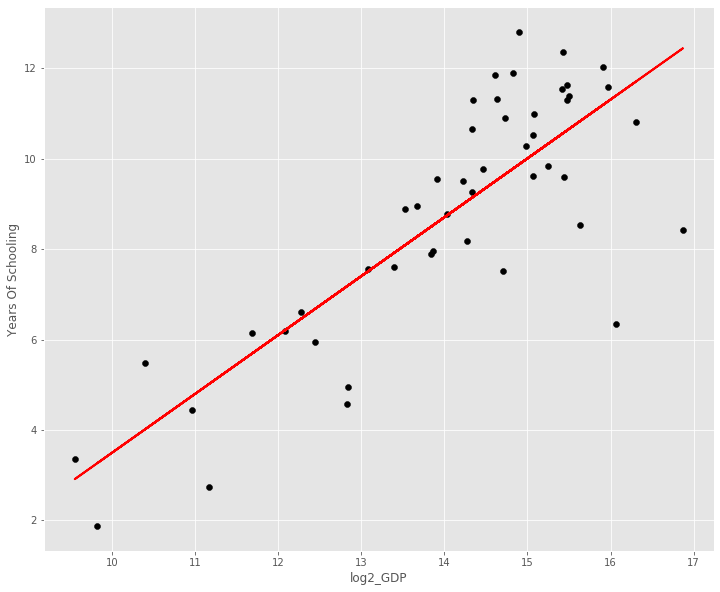

In [59]:
#plot log2(GDP) - education years with linear regression line
x = np.log2(data_with_sch["GDP"])
y = linear_res_ysc.params["Intercept"] + linear_res_ysc.params["np.log2(GDP)"]*x
plt.figure(figsize=(12,10))
plt.scatter(np.log2(data_with_sch["GDP"]),data_with_sch["yr_sch"],c="k")
plt.plot(x,y,c="r",linewidth=2)
plt.xlabel("log2_GDP")
plt.ylabel("Years Of Schooling")

In [60]:
#Create regression models with new data for PIRLS,TIMSS
linear_mod_PIRLS = smf.ols("PIRLS ~ np.log2(GDP)",data=data_with_sch)
linear_res_PIRLS = linear_mod_PIRLS.fit()
linear_mod_TIMSS = smf.ols("TIMSS ~ np.log2(GDP)",data=data_with_sch)
linear_res_TIMSS = linear_mod_TIMSS.fit()

Text(0, 0.5, 'PIRLS (Residualized)')

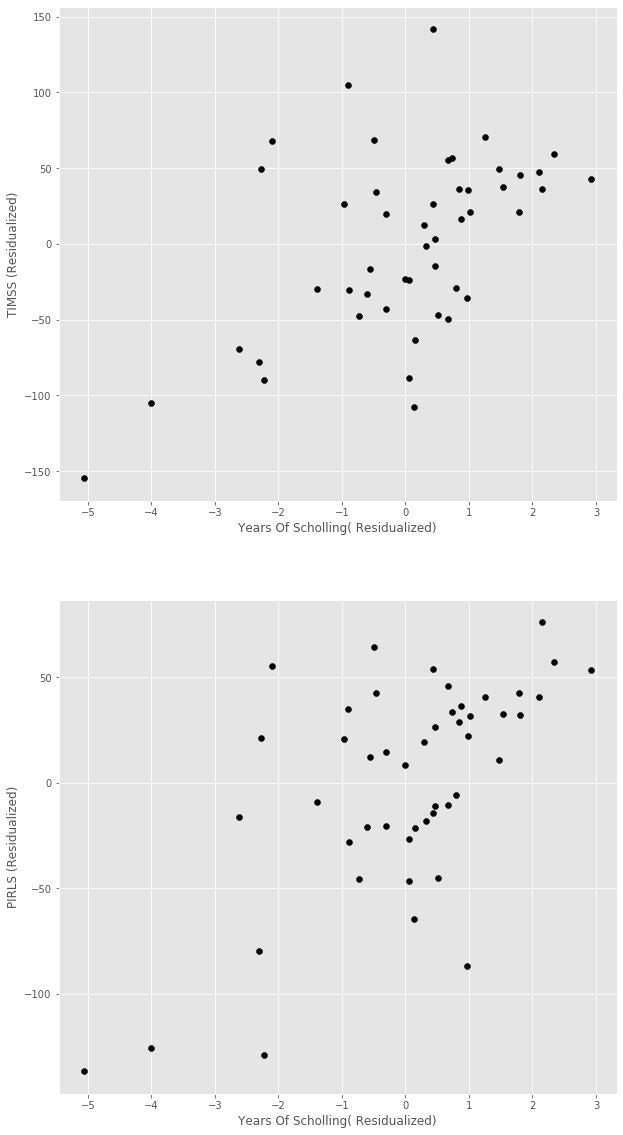

In [61]:
#Plot the residuals
plt.figure(figsize=(10,20))
plt.subplot(2,1,1)
plt.scatter(linear_res_ysc.resid,linear_res_TIMSS.resid,c="k")
plt.xlabel("Years Of Scholling( Residualized)")
plt.ylabel("TIMSS (Residualized)")

plt.subplot(2,1,2)
plt.scatter(linear_res_ysc.resid,linear_res_PIRLS.resid,c="k")
plt.xlabel("Years Of Scholling( Residualized)")
plt.ylabel("PIRLS (Residualized)")



#### Από τα διάγραμματα φένεται πως υπάρχει μια γραμμική συσχέτιση 

In [62]:
#Create a DataFrame with the residuals
resid_TIMSS = np.array(linear_res_TIMSS.resid)
resid_PIRLS = np.array(linear_res_PIRLS.resid)
resid_yr_sch = np.array(linear_res_ysc.resid)
resid_data = np.stack((resid_TIMSS,resid_PIRLS,resid_yr_sch))
resid_data = resid_data.T

residuals = pd.DataFrame(data=resid_data,
                        columns=["resid_TIMSS","resid_PIRLS","resid_yr_sch"])

In [63]:
#Check linear correlation between TIMSS(Residualized) and Years Of Schooling(Residualized)
linear_mod_resid_TIMSS = smf.ols(formula="resid_TIMSS ~ resid_yr_sch",data=residuals)
linear_res_resid_TIMSS = linear_mod_resid_TIMSS.fit()
linear_res_resid_TIMSS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            resid_TIMSS   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     17.89
Date:                Thu, 21 Apr 2022   Prob (F-statistic):           0.000110
Time:                        11:46:54   Log-Likelihood:                -256.20
No. Observations:                  48   AIC:                             516.4
Df Residuals:                      46   BIC:                             520.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.403e-13      7.420  -1.89e-14      1.000     -14.936      14.936
resid_yr_sch    20.0069      4.730      4.230      0.000      10.487      29.527
==============================================================================
Omnibus:                        5.139   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.077   Jarque-Bera (JB):                3.959
Skew:                           0.626   Prob(JB):                        0.138
Kurtosis:                       3.642   Cond. No.                         1.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Παρατηρούμε ενα R= 0.28 το οποίο σημαίνει πως το 28% των δεδομένων εξηγείται απο την γραμμική συσχέτισ

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0, 0.5, 'TIMSS (Residualized)')

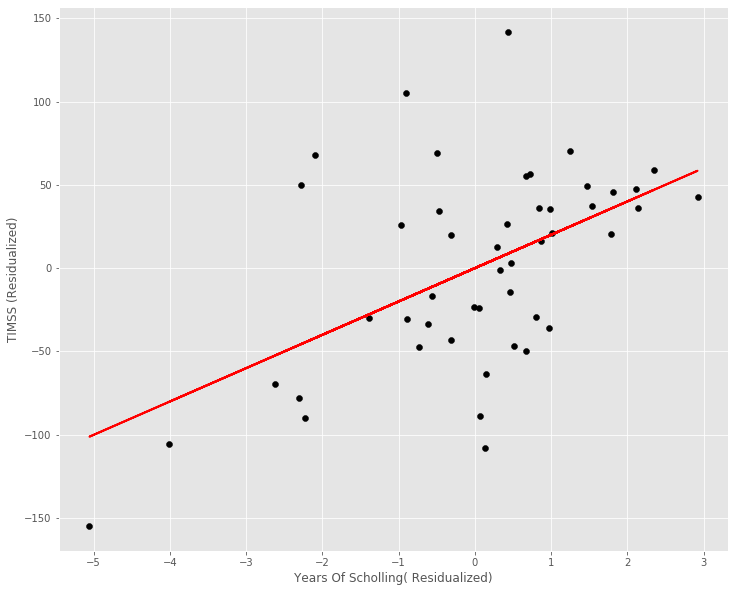

In [64]:
#Plot with the line that fit in model
plt.figure(figsize=(12,10))
x = residuals.resid_yr_sch
y = linear_res_resid_TIMSS.params["Intercept"] + linear_res_resid_TIMSS.params["resid_yr_sch"] * x
plt.scatter(linear_res_ysc.resid,linear_res_TIMSS.resid,c="k")
plt.plot(x,y,c="r",linewidth=2)
plt.xlabel("Years Of Scholling( Residualized)")
plt.ylabel("TIMSS (Residualized)")

In [65]:
#Check linear correlation between PIRLS(Residualized) and Years Of Schooling(Residualized)
linear_mod_resid_PIRLS = smf.ols("resid_PIRLS~resid_yr_sch",data=residuals)
linear_res_resid_PIRLS= linear_mod_resid_PIRLS.fit()
linear_res_resid_PIRLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            resid_PIRLS   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     29.49
Date:                Thu, 21 Apr 2022   Prob (F-statistic):           2.05e-06
Time:                        11:47:03   Log-Likelihood:                -244.26
No. Observations:                  48   AIC:                             492.5
Df Residuals:                      46   BIC:                             496.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.874e-13      5.787  -3.24e-14      1.000     -11.648      11.648
resid_yr_sch    20.0289      3.688      5.430      0.000      12.605      27.453
==============================================================================
Omnibus:                        1.340   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.512   Jarque-Bera (JB):                0.581
Skew:                          -0.148   Prob(JB):                        0.748
Kurtosis:                       3.450   Cond. No.                         1.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Παρατηρούμε ενα R= 0.391 το οποίο σημαίνει πως το 39% των δεδομένων εξηγείται απο την γραμμική συσχέτιση

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0, 0.5, 'PIRLS (Residualized)')

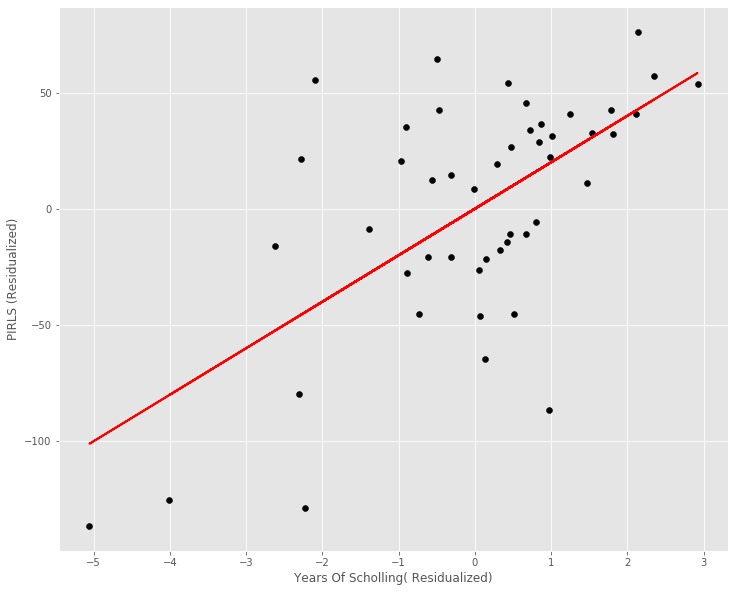

In [66]:
#Plot with the line that fit in model
plt.figure(figsize=(12,10))
x = residuals.resid_yr_sch
y = linear_res_resid_PIRLS.params["Intercept"] + linear_res_resid_PIRLS.params["resid_yr_sch"] * x
plt.scatter(linear_res_ysc.resid,linear_res_PIRLS.resid,c="k")
plt.plot(x,y,c="r",linewidth=2)
plt.xlabel("Years Of Scholling( Residualized)")
plt.ylabel("PIRLS (Residualized)")

### Άπο την ανάλυση συμπαρένουμε πως το κατακεφαλήν εισόδημα επηρεάζει αρκετα τις επιδόσεις των μαθητών διότι αρχίκα επιρεάζει τα χρόνια παρακολούθησης στο σχόλείο.Προφάνως σε χώρες με μικρό κατακεφαλήν εισόδημα τα παιδία υποχρεώνονται να δουλέψουν σε μικρότερη ηλικία για να βοηθήσουν τις οικογένειες τους με απότελεσμα να έχουν λιγότερο χρόνο εκπαίδευσης σε σχέση με παιδία τα οποία ζουν σε ποιο ανεπτυγμένες χώρες.Έτσι το συμπέρασμα αυτής της ανάλυσης μπορεί να χαρακτηριστεί και 'αντιρατσιστικό' δίοτι φένεται ξεκάθαρα πως κατα το μεγαλύτερο ποσοστό είναι θέμα εκπαίδευσης και όχι υψηλότερου IQ στο οποίο υπερτερούν τα παιδία των ανεπτυγμένων χωρών σε σχέση με τα παιδία τα οποία ζουν σε φτωχότερες χώρες.Επίσης από τα διαγράμματα παρατηρούμε πως η διαφορες στο χαμηλό εισόδημα επηρεάζουν αρκετά την επίδοση αλλά απο ένα ποσό και μετά(20.000 για την επίδοση στα μαθηματικά ~ 30.000 για την επίδοση στο δίαβασμα) τα χρήματα επηρεάζουν πολύ λίγο και προφάνως αρχίζουν να κάνουν την διαφορά χαρακτηριστικά οπώς το IQ,ο χαρακτήρας του μαθητή,ο χρόνος μελέτης που αφιερλωνει κτλ.Μια άλλη παρατήρηση είναι πως οι επιδόσεις στο διάβασμα ισορροπούν σε μεγαλύτερο εισόδημα από οτι τα μαθηματικά.Θα μπορούσαμε να υποθέσουμε πως τα μαθηματικά αρχίζουν να επιρεάζονται απο το IQ ποιο έντονα ενώ το δίαβασμα ίσως επιρεάζεται απο το πόσα εξοσχολικά βιβλια μπορεί να προσφέρει μια οικογένεια στα παιδία της ή και ακόμα να σκεφτούμε πως τα ερεθήσματα ενός παιδιού σε μια ποιο πλούσια οικογένεια ίσως είναι μεγαλύτερα στο πεδίο της γλώσσας ή των ξένων γλωσσών λόγο το ότι στο περιβάλλον του ίσως να υπάρχουν ποιο πολλοί σπουδαγμένοι άνθρωποι.Αλλα αυτό χρήζει περαιτέρω διερεύνησης!